In [422]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.nonparametric.smoothers_lowess import lowess

In [423]:
# Make global settings for the figures.
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
plt.rcParams["legend.labelcolor"] = 'black'
mpl.rcParams['pdf.fonttype'] = 42
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')
# File Paths
save_path = '../figures/'
data_path = "../data_files/lit_data.xlsx"
f_size = 12

In [424]:
mj = pd.read_excel(data_path, sheet_name='Majiashan')
mm = pd.read_excel(data_path, sheet_name='MM_USA')
js = pd.read_excel(data_path, sheet_name='Jesmond')
md = pd.read_excel(data_path, sheet_name='Mud')
wp = pd.read_excel(data_path, sheet_name='WPDS')
jia = pd.read_excel(data_path, sheet_name='Jiarong')
lg = pd.read_excel(data_path, sheet_name='Lower Guandao')
sh = pd.read_excel(data_path, sheet_name='Shitouzhai')
age_sulfur = pd.read_excel(data_path, sheet_name='aged_sulfur')
age_d13C = pd.read_excel(data_path, sheet_name='aged_d13C')
# age_d13C= age_d13C.sort_values(by='Age')
# age_sulfur = age_sulfur.sort_values(by='Age')

In [425]:
x = [mj.d13C, mj.d34S, mm.d13C, mm.d34S, js.d13C, js.d34S, md.d34S,
     wp.d13C, wp.d34S, jia.d13C, jia.d34S, lg.d34S, sh.d13C, sh.d34S]
y = [mj.height, mm.height, js.height, md.height, wp.height, jia.height, lg.height, sh.height]
label_Ccarb = r'$\delta^{13}C_{carb}\;(‰\;VPDB)$'
label_d34S = r'$\delta^{34}S_{CAS}\;(‰\;VCDT)$'
color = ["#838383", "#e76f51"]

# Majiashan

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


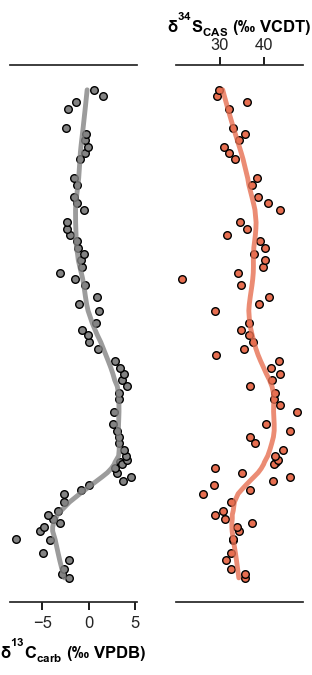

In [426]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1= axes
axes_ = [ax0, ax1]

x_axis = [x[0], x[1]]
y_axis = [y[0]]*2
labels = [label_Ccarb, label_d34S]

# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])
plt.tight_layout()

s_factor = 0.25  # a smoothing factor of 0.25 is used.

def scatter_plot(f_size,f_name):
    for i in range(len(axes_)):
        sns.scatterplot(x=x_axis[i], y=y_axis[i], ax=axes_[i],
                        color=color[i], legend=False, edgecolor='black',
                        s=30, linewidth=1,
                        )
        axes_[i].tick_params(labelsize=f_size, color="black")
        axes_[i].set_xlabel(labels[i], fontsize=f_size,
                            c="black", fontweight="bold")
        # Set the x-axis position based on the subplot index
        if i % 2 == 0:
            axes_[i].xaxis.set_ticks_position('bottom')  # x-axis at the bottom
            axes_[i].xaxis.set_label_position('bottom')  # x-axis at the bottom
        else:
            axes_[i].xaxis.set_ticks_position('top')  # x-axis at the top
            axes_[i].xaxis.set_label_position('top')  # x-axis at the top
        smoothed = lowess(x_axis[i], y_axis[i], frac=s_factor)
        axes_[i].plot(smoothed[:, 1], smoothed[:, 0],
                      c=color[i], linewidth=3.5, alpha=.8)
    plt.savefig(f"{save_path}{f_name}.pdf", dpi=600)

# def smoothed_line():
#     for i in range(len(axes_)):
#         axes_[i].plot(smoothed[i][:, 1], smoothed[i][:, 0],
#                     c=color[i], linewidth=3.5, alpha=.8)
        
scatter_plot(12,'Majiashan')

# Mineral Mountain

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


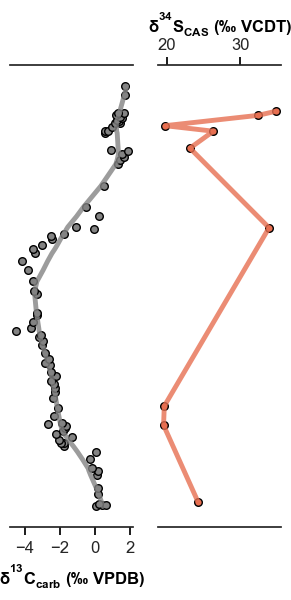

In [427]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

x_axis = [mm.d13C, mm.d34S]
y_axis = [mm.height, mm.height_n]

ax0.set_xticks([-4, -2, 0, 2])
scatter_plot(f_size,'MM')

# Jesmond

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


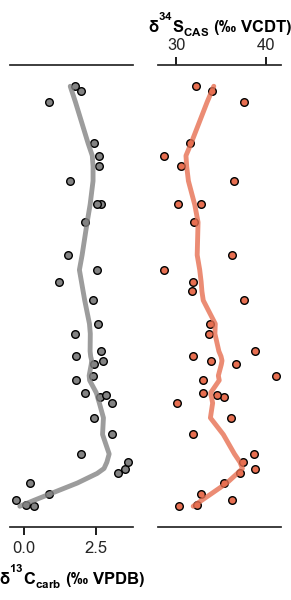

In [428]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                        ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

x_axis = [js.d13C, js.d34S]
y_axis = [js.height]*2

scatter_plot(f_size,"Jesmond")


# Mud

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


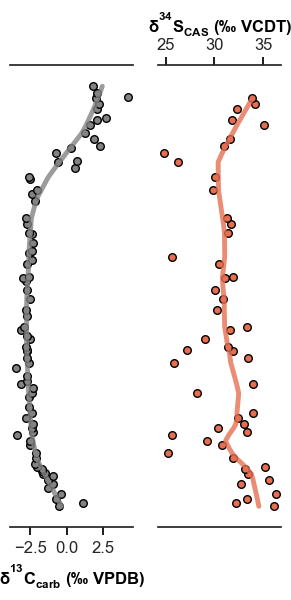

In [429]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

x_axis = [md.d13C, md.d34S]
y_axis = [md.pos_d13C, md.height]

scatter_plot(f_size, "Mud")


# West Pingdingshan

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


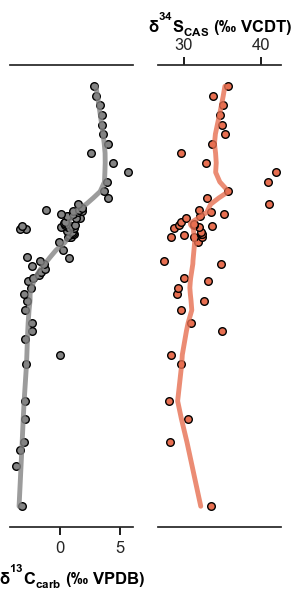

In [430]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

x_axis = [wp.d13C, wp.d34S]
y_axis = [wp.height]*2

scatter_plot(f_size, "WPDS")


# Jiarong

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


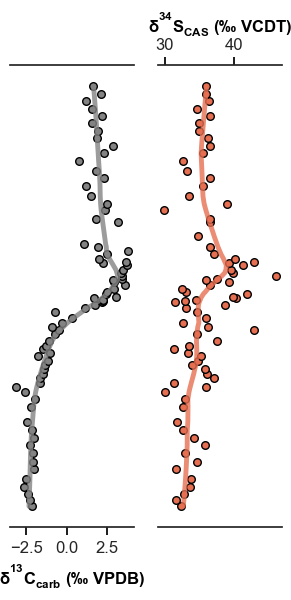

In [431]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

x_axis = [jia.d13C, jia.d34S]
y_axis = [jia.height]*2

scatter_plot(f_size, "Jiarong")


# Shitouzhai


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


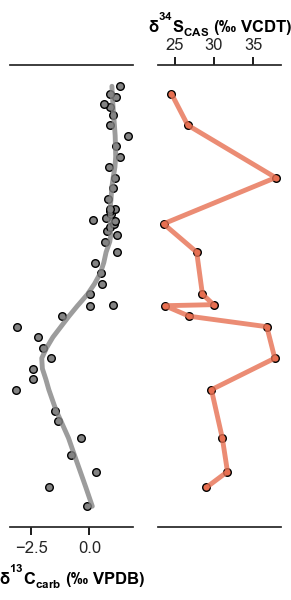

In [432]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

x_axis = [sh.d13C, sh.d34S]
y_axis = [sh.height]*2

scatter_plot(f_size, "Shitouzhai")


Lower Guandao

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


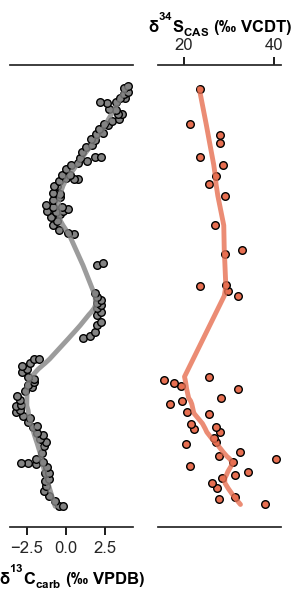

In [433]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

x_axis = [lg.d13C, lg.d34S]
y_axis = [lg.d13C_height, lg.height]

scatter_plot(f_size, "l_Guandao")


Plot of all data according to absolute age

In [434]:
# Select data from all rows except those from the current study
filtered_d13C = age_d13C.loc[~age_d13C['Author'].isin(['This Study'])]
filtered_d34S = age_sulfur.loc[~age_sulfur['Author'].isin(['This Study'])]
# type(filtered_d13C)
filtered_d13C.tail(2)

,Locality,Author,Age,d13C
693,Jesmond,Stebbins et al. 2019,248.219000,1.99
694,Jesmond,Stebbins et al. 2019,248.206631,1.77


In [435]:
def plot_smoothed_with_ci(x_data, y_data, ax, color, it=3, frac=0.3, is_sorted=True):

    # Fit lowess smoother
    smoothed_data = lowess(x_data, y_data, it=it, frac=frac, is_sorted=True)

    # Calculate residuals
    residuals = x_data - smoothed_data[:, 1]

    # Calculate standard error of residuals
    se = np.std(residuals)
    z_score = 1.96  # For a 95% confidence interval & assuming a normal distribution.

    # Calculate margin of error
    margin_of_error = z_score * se

    # Calculate confidence interval
    lower_bound = smoothed_data[:, 1] - margin_of_error
    upper_bound = smoothed_data[:, 1] + margin_of_error

    # Plot the smoothed values with confidence interval
    ax.plot(smoothed_data[:, 1], smoothed_data[:, 0], c=color, linewidth=5, alpha=0.8)
    ax.fill_betweenx(smoothed_data[:, 0], lower_bound, upper_bound, color=color, alpha=0.25)
    
    
# plot_smoothed_with_ci(d34S, pos_d34S, ax0, color, it, frac)

# All C and S-iso data except from current study

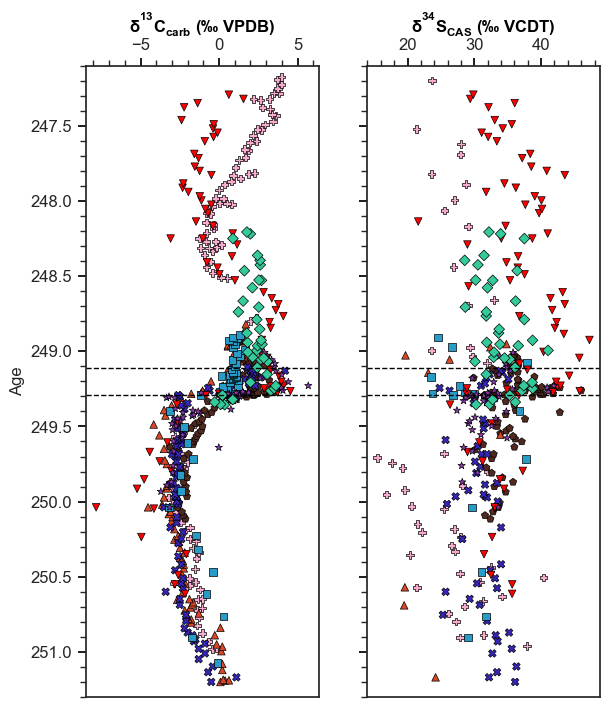

In [436]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(6, 7),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
color = ["#838383", "#e76f51"]
x_axis = [filtered_d13C["d13C"], filtered_d34S["d34S"]]
y_axis = [filtered_d13C["Age"], filtered_d34S["Age"]]
labels = [label_Ccarb, label_d34S]
color_ = ["#f7accf", "#51291e", "#d84727", "#3625be",  "#289cc9", "red","#903AB8", '#33cb9c']
markers_ = ['P', 'p', "^", "X", 's', 'v','*', 'D',]
plt.tight_layout()

data = [filtered_d13C, filtered_d34S]

def make_scatter_plot(f_size, data):
    for i in range(len(axes_)):
        sns.scatterplot(data = data[i], x=x_axis[i], y=y_axis[i], ax=axes_[i],hue= "Locality",
                        edgecolor='black', style = "Locality",
                        s=30, linewidth=.5, alpha=1, 
                        legend=False,
                        palette = color_,
                        markers = markers_
                        )
        axes_[i].tick_params(labelsize=f_size, color="black")
        axes_[i].set_xlabel(labels[i], fontsize=f_size,
                            c="black", fontweight="bold")
        axes_[i].minorticks_on()
        axes_[i].xaxis.set_ticks_position('top')  # x-axis at the top
        axes_[i].xaxis.set_label_position('top')  # x-axis at the top
        """# Set the x-axis position based on the subplot index
        if i % 2 == 0:
            axes_[i].xaxis.set_ticks_position('bottom')  # x-axis at the bottom
            axes_[i].xaxis.set_label_position('bottom')  # x-axis at the bottom
        else:
            axes_[i].xaxis.set_ticks_position('top')  # x-axis at the top
            axes_[i].xaxis.set_label_position('top')  # x-axis at the top
            """
        
        axes_[i].axhline(y=249.292, linewidth=1, color='black', linestyle='--')
        axes_[i].axhline(y=249.110, linewidth=1, color='black', linestyle='--')
        axes_[i].set_ylim(247.1, 251.3)   
    plt.gca().invert_yaxis()
    # plt.legend(loc='upper right',edgecolor='black')
    
      
make_scatter_plot(12, data)

def plot_all_with_lowess(save_path, file_name):
    d13C_df = filtered_d13C[['Age','d13C']].copy().dropna().sort_values(by="Age", ascending=True)
    d34S_df = filtered_d34S[["Age", "d34S"]].copy().dropna().sort_values(by="Age", ascending=True)
    plot_smoothed_with_ci(d13C_df['d13C'], d13C_df['Age'], ax0, color[0], it=5, frac=0.3)
    plot_smoothed_with_ci(d34S_df['d34S'], d34S_df['Age'], ax1, color[1],it=5, frac=0.3)

    plt.savefig(f"{save_path}{file_name}", dpi=600)

# plot_all_with_lowess(save_path, "CAS_age.pdf")

# del filtered_d13C
# del filtered_d34S

# Plot data without Oman

In [437]:
# Select data from all rows except those from the current study and Guandao
filtered_d13C2 = age_d13C.loc[~age_d13C['Locality'].isin(['Jebel Aweri','Wadi Musjah'])]
filtered_d34S2 = age_sulfur.loc[~age_sulfur['Locality'].isin(['Jebel Aweri','Wadi Musjah'])]
filtered_d13C2.head(2)
# filtered_d34S = filtered_d34S.groupby('Locality')
# for name, group in filtered_d34S:
#     print(name)


,Locality,Author,Age,d13C
0,Guandao,Song et al. 2014,250.979865,-0.432610
1,Guandao,Song et al. 2014,250.972000,-0.176638


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


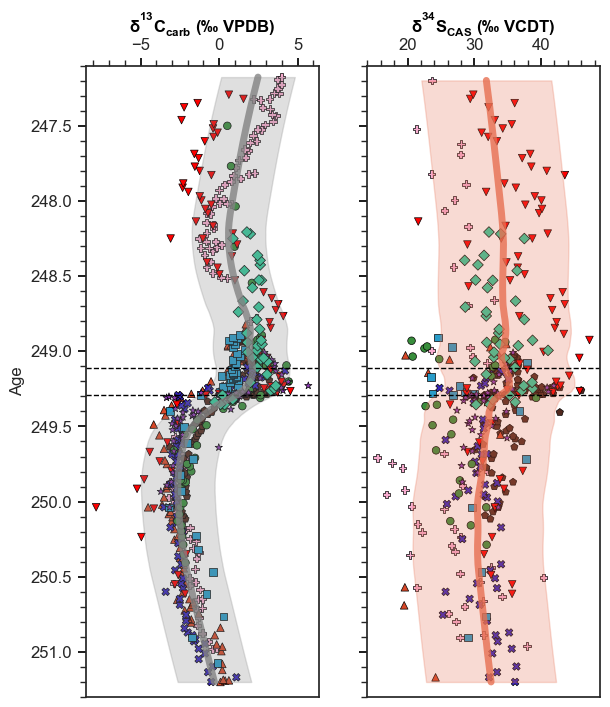

In [438]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(6, 7),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
color = ["#838383", "#e76f51"]
x_axis = [filtered_d13C2["d13C"], filtered_d34S2["d34S"]]
y_axis = [filtered_d13C2["Age"], filtered_d34S2["Age"]]
labels = [label_Ccarb, label_d34S]
color_ = ["#f7accf", "#51291e", "#d84727", "#3625be", "#388E3C", "#289cc9", "red","#903AB8", "#33cb9c"]
markers_ = ['P', 'p', "^", "X", 'o', 's', 'v','*', 'D'] 
plt.tight_layout()

data = [filtered_d13C2, filtered_d34S2]

make_scatter_plot(12, data)

d13C_df = filtered_d13C2[['Age','d13C']].copy().dropna().sort_values(by="Age", ascending=True)
d34S_df = filtered_d34S2[["Age", "d34S"]].copy().dropna().sort_values(by="Age", ascending=True)
plot_smoothed_with_ci(d13C_df['d13C'], d13C_df['Age'], ax0, color[0], it=5, frac=0.3)
plot_smoothed_with_ci(d34S_df['d34S'], d34S_df['Age'], ax1, color[1],it=5, frac=0.3)

plt.savefig(f"{save_path}CAS_noOman.pdf", dpi=600)

# All data plotted

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


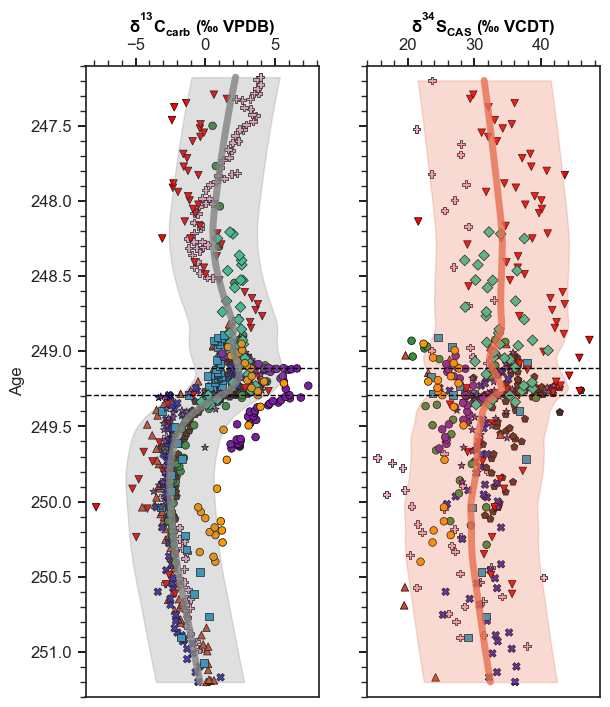

In [439]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(6, 7),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
color = ["#838383", "#e76f51"]
x_axis = [age_d13C["d13C"], age_sulfur["d34S"]]
y_axis = [age_d13C["Age"], age_sulfur["Age"]]
labels = [label_Ccarb, label_d34S]
color_ = ["#f7accf", "#51291e", "#d84727", "#3625be", "#388E3C", "#289cc9", "red","#903AB8", "#7B1FA2", "#33cb9c","#FF9800"]
markers_ = ['P', 'p', "^", "X", 'o', 's', 'v','*','o', 'D', 'o']
plt.tight_layout()

data = [age_d13C, age_sulfur]

make_scatter_plot(12, data)

d13C_df = age_d13C[['Age','d13C']].copy().dropna().sort_values(by="Age", ascending=True)
d34S_df = age_sulfur[["Age", "d34S"]].copy().dropna().sort_values(by="Age", ascending=True)

plot_smoothed_with_ci(d13C_df['d13C'], d13C_df['Age'], ax0, color[0], frac=0.3)
plot_smoothed_with_ci(d34S_df['d34S'], d34S_df['Age'], ax1, color[1],it=1, frac=0.3)

plt.savefig(f"{save_path}CAS_all_age.pdf", dpi=600)

# Just this Study

In [440]:
carbon = age_d13C.loc[age_d13C['Locality'].isin(['Jebel Aweri', 'Wadi Musjah'])]
sulfur = age_sulfur.loc[age_sulfur['Locality'].isin(['Jebel Aweri', 'Wadi Musjah'])]
color_ = ['#7B1FA2', '#FF9800']
markers_ = ['o']*2 

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


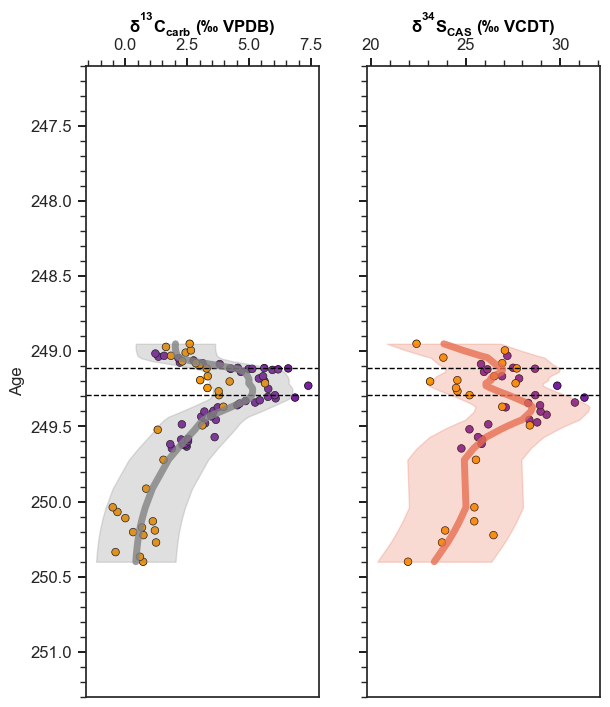

In [441]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(6, 7),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
label_d18O = r'$\delta^{18}O_{CAS}\;(‰\;SMOW)$'
color = ["#838383", "#e76f51"]
x_axis = [carbon["d13C"], sulfur["d34S"]]
y_axis = [carbon["Age"], sulfur["Age"],]
labels = [label_Ccarb, label_d34S]
plt.tight_layout()

data = [carbon, sulfur]
make_scatter_plot(12, data)

d13C_df = carbon[['Age','d13C']].copy().dropna().sort_values(by="Age", ascending=True)
d34S_df = sulfur[["Age", "d34S"]].copy().dropna().sort_values(by="Age", ascending=True)

plot_smoothed_with_ci(d13C_df['d13C'], d13C_df['Age'], ax0, color[0], it=5, frac=0.3)
plot_smoothed_with_ci(d34S_df['d34S'], d34S_df['Age'], ax1, color[1],it=5, frac=0.3)

plt.savefig(f"{save_path}CAS_TS_age.pdf", dpi=600)

Check distribution of data

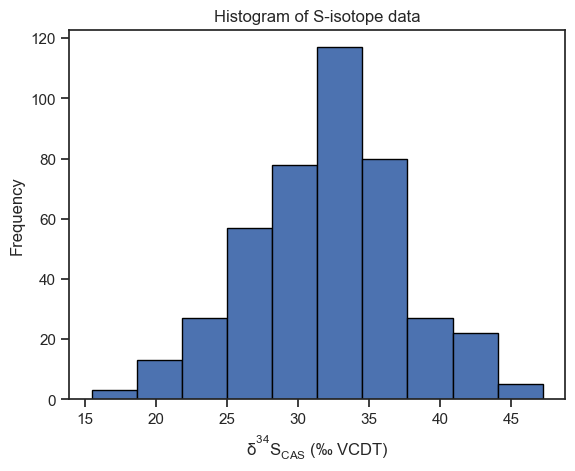

In [442]:
def plot_histogram(df_col):
    df_col.plot.hist(bins=10, edgecolor='black')
    plt.title('Histogram of S-isotope data')
    plt.xlabel(label_d34S)


plot_histogram(age_sulfur['d34S'])

In [443]:
d34S_skew = age_sulfur['d34S'].skew()
d34S_kurtosis = age_sulfur['d34S'].kurt()
d34S_skew, d34S_kurtosis

(-0.04654833964392915, 0.08160290265434478)

In [444]:
qia_d34S = age_sulfur[age_sulfur["Locality"]=="Qiakong"]['d34S']
ja_d34S = age_sulfur[age_sulfur["Locality"]=="Jebel Aweri"]['d34S']
wmj_d34S = age_sulfur[age_sulfur["Locality"]=="Wadi Musjah"]['d34S']

my_sulfur = age_sulfur.loc[age_sulfur['Locality'].isin(['Qiakong', 'Jebel Aweri', 'Wadi Musjah'])]
my_d34S = my_sulfur['d34S']

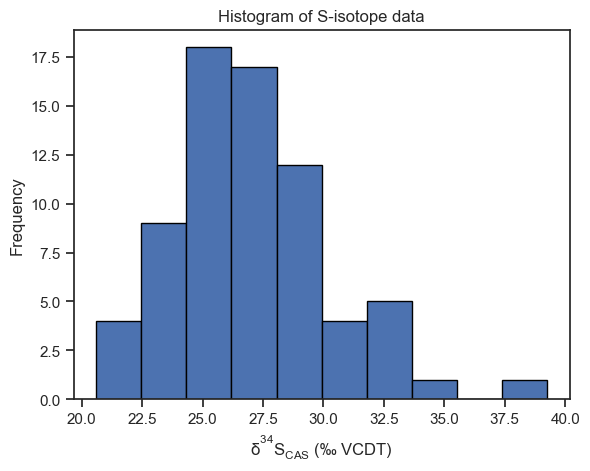

In [445]:
plot_histogram(my_d34S)

In [446]:
# Oman_smoothed_d34S = lowess(x_axis[1], y_axis[1], frac = s_factor)
# Oman_smoothed_d13C = lowess(x_axis[0], y_axis[0], frac = s_factor)
# df=pd.DataFrame(Oman_smoothed_d34S)
# df2=pd.DataFrame(Oman_smoothed_d13C)
# df.to_excel('../data_files/smooth_Oman2.xlsx')

# with pd.ExcelWriter("../data_files/smooth_Oman2.xlsx", engine="openpyxl", mode='a', if_sheet_exists='overlay') as writer:
#     df2.to_excel(writer, sheet_name='d13C',
#                         index=True, float_format="%.3f")

# Implement Grubbs outlier test

## Qiakong

In [447]:
from scipy import stats

data = age_sulfur[age_sulfur["Locality"] == "Qiakong"]["d34S"]

def grubbs_test(data):
    """data should be a column from a pandas dataframe"""
    data_array = np.array(data.to_list())
    mean = np.mean(data_array)
    std_dev = np.std(data_array, ddof=1)  # Use ddof=1 for sample standard deviation
    # mean, std_dev

    # perform Grubbs test
    n = len(data_array)
    test_statistic = abs(data_array - mean) / std_dev
    critical_value = stats.t.ppf(0.975, n - 2) / np.sqrt(n)
    z_scores = (data - mean) / std_dev
    p_values = 2 * (1 - stats.t.cdf(test_statistic, n - 2))

    outliers_grubbs = data_array[test_statistic > critical_value]

    # Identify outliers based on Z-scores and p-values
    alpha = 0.05  # Significance level for p-values
    outliers_z_score = data[p_values < alpha]

    print("Outliers identified by Grubbs' test:", outliers_grubbs)
    print("Z-scores:", z_scores)
    print("P-values:", p_values)
    print("Outliers identified by Z-scores and p-values:", outliers_z_score)

# Jebel Aweri

In [449]:
JA_data = sulfur[sulfur["Locality"] == "Jebel Aweri"]["d34S"]
# outliers = grubbs_test(JA_data) 
# outliers

Outliers identified by Grubbs' test: [24.76926272 25.83889661 25.86819925 25.6483184  25.19663572 26.19113136
 28.77681219 28.36196402 29.27484362 28.95528337 28.92883384 30.77108388
 31.27578812 28.67578477 29.83930232 25.96689823 26.14429202 28.66421913
 25.80837894]
Z-scores: 345   -1.604334
346   -0.996573
347   -0.979923
348   -1.104858
349   -1.361502
350   -0.796435
351    0.672737
352    0.437022
353    0.955716
354    0.774143
355   -0.272161
356    0.759115
357    0.404929
358    1.805873
359    2.092643
360    0.615334
361    1.276439
362    0.129708
363   -0.383098
364   -0.923843
365   -0.823049
366    0.608762
367   -0.050054
368   -1.013913
369   -0.222679
Name: d34S, dtype: float64
P-values: [0.12228545 0.32934175 0.33731988 0.28064545 0.18654448 0.43392379
 0.50781793 0.666171   0.3491539  0.44673117 0.7879264  0.45549386
 0.68927091 0.08404397 0.04760983 0.54437553 0.21453907 0.89792482
 0.70516508 0.36515953 0.41893266 0.54864812 0.96051155 0.32117241
 0.82575065]
Ou

Wadi Musjah

In [450]:
wmj_data = sulfur[sulfur["Locality"] == "Wadi Musjah"]["d34S"]
# outliers = grubbs_test(wmj_data) 
# len(outliers)

Outliers identified by Grubbs' test: [21.94910099 23.7457908  26.46787522 23.91222739 28.38869892 26.93
 24.48692722 23.11562734 27.63412672 26.50257238 27.7        26.93
 23.81751658 27.06983677 22.39837054]
Z-scores: 408   -1.874897
409   -0.876908
410    0.635101
411   -0.784459
412    0.068539
413    0.073037
414    0.120003
415    1.702042
416    0.891793
417   -0.067690
418   -0.423979
419   -0.465236
420   -1.226939
421    1.282907
422   -0.426031
423    0.654374
424    1.319497
425    0.891793
426   -0.837067
427    0.969467
428   -1.625346
Name: d34S, dtype: float64
P-values: [0.07626361 0.39148963 0.532937   0.44244208 0.94607278 0.94253981
 0.90574096 0.10505361 0.38365904 0.94673941 0.67634255 0.64705026
 0.23483266 0.21495414 0.67487241 0.52071394 0.20268303 0.38365904
 0.41296011 0.34449261 0.12056145]
Outliers identified by Z-scores and p-values: Series([], Name: d34S, dtype: float64)
